# Navigating the Skies of Opportunity – A Data-Driven Approach to Aircraft Risk Assessment

## Introduction

Our company is embarking on an exciting new venture, expanding its portfolio into the dynamic world of aviation, encompassing both commercial and private air enterprises. This strategic diversification aims to strengthen our market position and open new avenues for growth. However, entering an industry as complex and regulated as aviation presents unique challenges, particularly concerning inherent operational risks associated with an aircraft.

To ensure a successful and secure entry into this sector, a critical first step is to thoroughly understand and mitigate potential risks. This project is specifically designed to address this imperative need. 

## Aim
identify and assess the risk profiles of various aircraft types in oreder to pinpoint aircraft that represent the lowest operational risk, thereby providing a robust foundation for our **company's new** aviation division.

## Objectives

The insights gleaned from this analysis will be more than just raw data; they will be translated into clear, actionable recommendations. These findings will serve as an indispensable guide for the Head of the new Aviation Division, empowering them to make informed and strategic decisions regarding aircraft acquisition. By leveraging data-driven insights, we aim to minimize potential liabilities, optimize operational safety, and pave the way for a secure and profitable future in the aviation industry.

 1. To determine the yield per capita for the two main staple crops of the region.
 2. To determine the population density.
 3. To compare Sorghum and Maize production.
 4. To access the vulnerability to food insecurity shocks.


### 1.0 Data Loading

In [182]:
#Importing the Libraries needed 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 Data Inspection

In [183]:
#Loading the CSV
df = pd.read_csv('data\Aviation_Data.csv')
df

C:\Users\Achie\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [184]:
# To check that the csv loaded successfullysplay the first few rows of the DataFrame to confirm successful loading
print("DataFrame loaded successfully. These are the first 5 rows:")
df.head()

DataFrame loaded successfully. These are the first 5 rows:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [185]:
print("DataFrame loaded successfully. These are the last 5 rows:")
df.tail()

DataFrame loaded successfully. These are the last 5 rows:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [186]:
#Checking info about the dataframe icluding the datatypes and non-values
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                 

Obeservation: The dataframe contains floats and objects. There are 31 columns and  90348 rows including the column names.

In [187]:
df.columns = df.columns.str.replace('.', '_', regex=False)
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [188]:
print("DataFrame dimension is a tuple of:")
df.shape

DataFrame dimension is a tuple of:


(90348, 31)

In [189]:
#To check the names of the 31 columns
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [190]:
df.dtypes

Event_Id                   object
Investigation_Type         object
Accident_Number            object
Event_Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport_Code               object
Airport_Name               object
Injury_Severity            object
Aircraft_damage            object
Aircraft_Category          object
Registration_Number        object
Make                       object
Model                      object
Amateur_Built              object
Number_of_Engines         float64
Engine_Type                object
FAR_Description            object
Schedule                   object
Purpose_of_flight          object
Air_carrier                object
Total_Fatal_Injuries      float64
Total_Serious_Injuries    float64
Total_Minor_Injuries      float64
Total_Uninjured           float64
Weather_Condition          object
Broad_phase_of_flight      object
Report_Status 

In [191]:
df['Engine_Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: Engine_Type, dtype: int64

In [192]:
df['Aircraft_Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft_Category, dtype: int64

In [193]:
#Checking for null values before droping rows
df.isnull().sum()

Event_Id                   1459
Investigation_Type            0
Accident_Number            1459
Event_Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport_Code              40099
Airport_Name              37558
Injury_Severity            2459
Aircraft_damage            4653
Aircraft_Category         58061
Registration_Number        2776
Make                       1522
Model                      1551
Amateur_Built              1561
Number_of_Engines          7543
Engine_Type                8536
FAR_Description           58325
Schedule                  77766
Purpose_of_flight          7651
Air_carrier               73700
Total_Fatal_Injuries      12860
Total_Serious_Injuries    13969
Total_Minor_Injuries      13392
Total_Uninjured            7371
Weather_Condition          5951
Broad_phase_of_flight     28624
Report_Status              7840
Publication_Date          16689
dtype: i

In [194]:
df['Purpose_of_flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose_of_flight, dtype: int64

In [195]:
#Check for duplicated rows using the event id.
duplicates = df[df.duplicated(keep=False)].sort_values(by='Event_Id')
duplicates

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
64030,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90004,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90010,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90031,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90090,NaN,20-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
#Check for duplicates in the dataframe
df.duplicated().value_counts()

False    88958
True      1390
dtype: int64

In [197]:
#droping dupicated Entries
df = df.drop_duplicates()
df

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [198]:
#Check if duplicated rows have been dropped from the dataframe.
df.duplicated().value_counts()

False    88958
dtype: int64

In [199]:
df.nunique()

Event_Id                  87951
Investigation_Type           71
Accident_Number           88863
Event_Date                14782
Location                  27758
Country                     219
Latitude                  25592
Longitude                 27156
Airport_Code              10375
Airport_Name              24871
Injury_Severity             109
Aircraft_damage               4
Aircraft_Category            15
Registration_Number       79105
Make                       8237
Model                     12318
Amateur_Built                 2
Number_of_Engines             7
Engine_Type                  13
FAR_Description              31
Schedule                      3
Purpose_of_flight            26
Air_carrier               13590
Total_Fatal_Injuries        125
Total_Serious_Injuries       50
Total_Minor_Injuries         57
Total_Uninjured             379
Weather_Condition             4
Broad_phase_of_flight        12
Report_Status             17007
Publication_Date           2923
dtype: i

In [200]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_Engines,82805.0,1.146585,0.446510,0.0,1.0,1.0,1.0,8.0
Total_Fatal_Injuries,77488.0,0.647855,5.485960,0.0,0.0,0.0,0.0,349.0
Total_Serious_Injuries,76379.0,0.279881,1.544084,0.0,0.0,0.0,0.0,161.0
Total_Minor_Injuries,76956.0,0.357061,2.235625,0.0,0.0,0.0,0.0,380.0
Total_Uninjured,82977.0,5.325440,27.913634,0.0,0.0,1.0,2.0,699.0


In [201]:
df.corr()

,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
Number_of_Engines,1.000000,0.098505,0.046157,0.098162,0.406058
Total_Fatal_Injuries,0.098505,1.000000,0.135724,0.073559,-0.015214
Total_Serious_Injuries,0.046157,0.135724,1.000000,0.326849,0.052869
Total_Minor_Injuries,0.098162,0.073559,0.326849,1.000000,0.147770
Total_Uninjured,0.406058,-0.015214,0.052869,0.147770,1.000000


### Outliers

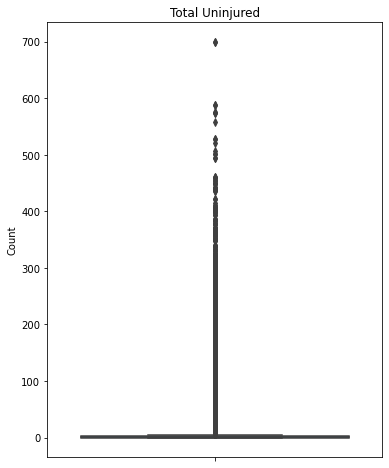

In [202]:
#Checking for outliers in Total Uninjured
plt.figure(figsize=(6, 8))
sns.boxplot(y = df['Total_Uninjured'])
plt.title('Total Uninjured')
plt.ylabel('Count')
plt.show()


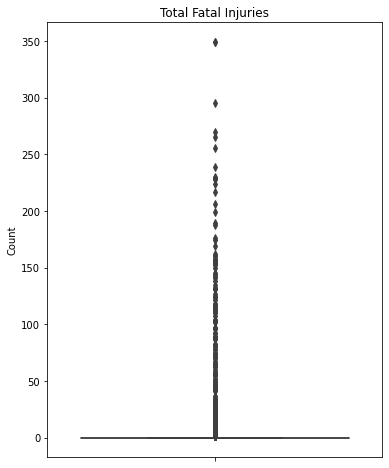

In [203]:
#Total Fatal Injuries
plt.figure(figsize=(6, 8))
sns.boxplot(y= df['Total_Fatal_Injuries'])
plt.title('Total Fatal Injuries')
plt.ylabel('Count')
plt.show()

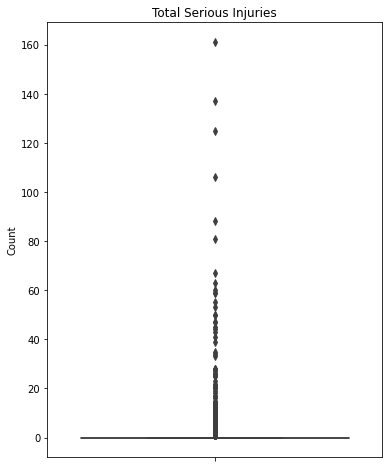

In [204]:
#Total serious but non fatal injuries
plt.figure(figsize=(6, 8))
sns.boxplot(y= df['Total_Serious_Injuries'])
plt.title('Total Serious Injuries')
plt.ylabel('Count')
plt.show()

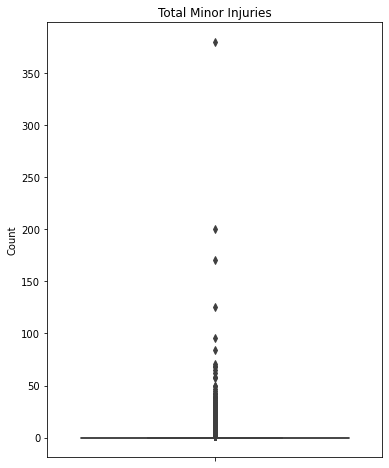

The mean number of total minor injuries is: 0.3570611778158948


In [205]:
#Total Minor Injuries
plt.figure(figsize=(6, 8))
sns.boxplot(y= df['Total_Minor_Injuries'])
plt.title('Total Minor Injuries')
plt.ylabel('Count')
plt.show()
print(f'The mean number of total minor injuries is: {df["Total_Minor_Injuries"].mean()}')

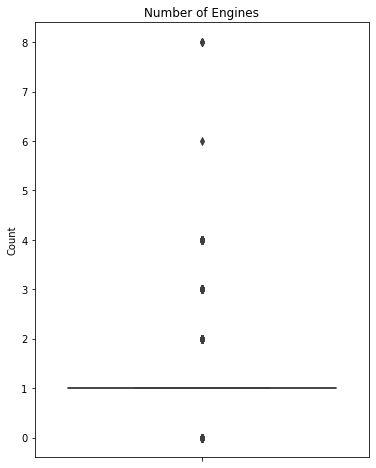

The mean number of Engines is: 1.1465853511261397


array([ 1., nan,  2.,  0.,  3.,  4.,  8.,  6.])

In [206]:
plt.figure(figsize=(6, 8))
sns.boxplot(y= df['Number_of_Engines'])
plt.title('Number of Engines')
plt.ylabel('Count')
plt.show()
print(f'The mean number of Engines is: {df["Number_of_Engines"].mean()}')
df['Number_of_Engines'].unique()

**NB**

- In this study, the outliers in the passenger columns( fatal, serious minor and uninjured)will be carried forward as a saftey measure. We can not disregard the outliers as they may give insight to which Aircraft is best

In [207]:
object_df = df.applymap(lambda x: str(x))
object_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88958 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event_Id                88958 non-null  object
 1   Investigation_Type      88958 non-null  object
 2   Accident_Number         88958 non-null  object
 3   Event_Date              88958 non-null  object
 4   Location                88958 non-null  object
 5   Country                 88958 non-null  object
 6   Latitude                88958 non-null  object
 7   Longitude               88958 non-null  object
 8   Airport_Code            88958 non-null  object
 9   Airport_Name            88958 non-null  object
 10  Injury_Severity         88958 non-null  object
 11  Aircraft_damage         88958 non-null  object
 12  Aircraft_Category       88958 non-null  object
 13  Registration_Number     88958 non-null  object
 14  Make                    88958 non-null  object
 15  Mo

In [208]:
#Null values after dropping duplicates
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

Event_Id                   0.077565
Investigation_Type         0.000000
Accident_Number            0.077565
Event_Date                 0.077565
Location                   0.136019
Country                    0.331617
Latitude                  61.350300
Longitude                 61.360417
Airport_Code              43.513793
Airport_Name              40.657389
Injury_Severity            1.201691
Aircraft_damage            3.668023
Aircraft_Category         63.705344
Registration_Number        1.558039
Make                       0.148385
Model                      0.180984
Amateur_Built              0.192226
Number_of_Engines          6.916747
Engine_Type                8.033004
FAR_Description           64.002113
Schedule                  85.856247
Purpose_of_flight          7.038153
Air_carrier               81.285550
Total_Fatal_Injuries      12.893725
Total_Serious_Injuries    14.140381
Total_Minor_Injuries      13.491760
Total_Uninjured            6.723398
Weather_Condition          5

**Observation:**

Percentage Missing Data for columns with over 40% missing data
1. 61.4% of  Longitudes and Latitudes
2. 43.5% of Airport Code 
3. 40.7% of Airport Name 
4. 63.7% of Aircraft Category
5. 64.0% of FAR Description
6. 85.9% of Schedule
7. 81.3% of Air carrier

#### Function to get categorical modes 

In [209]:
def get_categorical_modes(df):
    categorical_modes = {}
    
    # Iterate through columns
    for col in df.columns:
        
        # Check if the column's dtype is 'object' (typically strings)
        # or 'category' (explicitly defined categorical type)
        
        if df[col].dtype == 'object':
            mode_value = df[col].mode()
            categorical_modes[col] = mode_value
            
    return categorical_modes

In [210]:
get_categorical_modes(df)

{'Event_Id': 0    20001212X19172
 1    20001214X45071
 dtype: object,
 'Investigation_Type': 0    Accident
 dtype: object,
 'Accident_Number': 0     CEN22FA424
 1     CEN22LA149
 2     CEN22LA346
 3     CEN23MA034
 4     DCA22LA135
 5     DCA22LA201
 6     DCA22WA089
 7     DCA22WA130
 8     DCA22WA158
 9     DCA22WA167
 10    DCA22WA172
 11    DCA22WA204
 12    DCA22WA214
 13    DCA23WA071
 14    ERA22FA318
 15    ERA22FA338
 16    ERA22LA103
 17    ERA22LA119
 18    ERA22LA364
 19    ERA22LA379
 20    GAA22WA241
 21    WPR22FA309
 22    WPR22LA143
 23    WPR22LA201
 24    WPR23LA041
 25    WPR23LA045
 dtype: object,
 'Event_Date': 0    1982-05-16
 1    1984-06-30
 2    2000-07-08
 dtype: object,
 'Location': 0    ANCHORAGE, AK
 dtype: object,
 'Country': 0    United States
 dtype: object,
 'Latitude': 0    332739N
 dtype: object,
 'Longitude': 0    0112457W
 dtype: object,
 'Airport_Code': 0    NONE
 dtype: object,
 'Airport_Name': 0    Private
 dtype: object,
 'Injury_Severity': 0  

In [211]:
df.notna().sum() # filled values in each column

Event_Id                  88889
Investigation_Type        88958
Accident_Number           88889
Event_Date                88889
Location                  88837
Country                   88663
Latitude                  34382
Longitude                 34373
Airport_Code              50249
Airport_Name              52790
Injury_Severity           87889
Aircraft_damage           85695
Aircraft_Category         32287
Registration_Number       87572
Make                      88826
Model                     88797
Amateur_Built             88787
Number_of_Engines         82805
Engine_Type               81812
FAR_Description           32023
Schedule                  12582
Purpose_of_flight         82697
Air_carrier               16648
Total_Fatal_Injuries      77488
Total_Serious_Injuries    76379
Total_Minor_Injuries      76956
Total_Uninjured           82977
Weather_Condition         84397
Broad_phase_of_flight     61724
Report_Status             82508
Publication_Date          73659
dtype: i

In [212]:
reg_no_duplicates = df['Registration_Number'].duplicated().sum() #What aircraft is this?
print(reg_no_duplicates)

9852


In [213]:
df['Broad_phase_of_flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad_phase_of_flight, dtype: int64

**Observation:**
- Most accidents occur in the Landing phase of flight followed by Take-off then lastly during cruise.

In [214]:
df['Purpose_of_flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose_of_flight, dtype: int64

**Observation**
- Aircrafts that seem to involved in more accidents seem to be used mostly for Personal and Instructional use.

In [215]:
df['Injury_Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(124)        1
Fatal(45)         1
Fatal(143)        1
Fatal(217)        1
Fatal(43)         1
Name: Injury_Severity, Length: 109, dtype: int64

**Observation:**
- Most accidents in the dataset were of non-fatal injury severity.

In [216]:
df['Aircraft_damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft_damage, dtype: int64

**Observation:** 
- Majority of accident entries were of substantial aircraft damage. 

In [217]:
df['Make'].value_counts()

Cessna                          22227
Piper                           12029
CESSNA                           4922
Beech                            4330
PIPER                            2841
                                ...  
MUELLER MICHAEL WALTER              1
MICHAEL J ROBBINS                   1
Bitton/sport Flight Aviation        1
Phantom Sport Airplane              1
MACLEOD                             1
Name: Make, Length: 8237, dtype: int64

In [218]:
df['Weather_Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather_Condition, dtype: int64

In [219]:
df['Aircraft_Category'].value_counts().sum()

32287

In [220]:
df['Engine_Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: Engine_Type, dtype: int64

### Filling in NaN Values in Columns of Interest.

In [221]:
#df2 = drop Aircraft_Category,Latitude,Longitude,Airport_Code,Airport_Name,Report_Status,Publication_Date
df

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [222]:
#Forming a new dataframe with the columns to be used in this analysis df1
df1= df.copy()
df1 = df1[['Investigation_Type','Make','Purpose_of_flight', 'Model', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition', 'Broad_phase_of_flight', 'Injury_Severity', 'Aircraft_damage','Aircraft_Category','Registration_Number', 'Number_of_Engines', 'Engine_Type' ]] # Selects only 'col_A' and 'col_C'
df1

,Investigation_Type,Make,Purpose_of_flight,Model,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Number_of_Engines,Engine_Type
0,Accident,Stinson,Personal,108-3,2.0,0.0,0.0,0.0,UNK,Cruise,Fatal(2),Destroyed,NaN,NC6404,1.0,Reciprocating
1,Accident,Piper,Personal,PA24-180,4.0,0.0,0.0,0.0,UNK,Unknown,Fatal(4),Destroyed,NaN,N5069P,1.0,Reciprocating
2,Accident,Cessna,Personal,172M,3.0,NaN,NaN,NaN,IMC,Cruise,Fatal(3),Destroyed,NaN,N5142R,1.0,Reciprocating
3,Accident,Rockwell,Personal,112,2.0,0.0,0.0,0.0,IMC,Cruise,Fatal(2),Destroyed,NaN,N1168J,1.0,Reciprocating
4,Accident,Cessna,Personal,501,1.0,2.0,NaN,0.0,VMC,Approach,Fatal(1),Destroyed,NaN,N15NY,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,PIPER,Personal,PA-28-151,0.0,1.0,0.0,0.0,NaN,NaN,Minor,NaN,NaN,N1867H,NaN,NaN
90344,Accident,BELLANCA,NaN,7ECA,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,N2895Z,NaN,NaN
90345,Accident,AMERICAN CHAMPION AIRCRAFT,Personal,8GCBC,0.0,0.0,0.0,1.0,VMC,NaN,Non-Fatal,Substantial,Airplane,N749PJ,1.0,NaN
90346,Accident,CESSNA,Personal,210N,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,N210CU,NaN,NaN


In [223]:
df2 = df1.loc[(df1['Aircraft_Category'] == 'Airplane') | (df1['Aircraft_Category'] == 'Helicopter')]
df2

,Investigation_Type,Make,Purpose_of_flight,Model,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Number_of_Engines,Engine_Type
5,Accident,Mcdonnell Douglas,NaN,DC9,NaN,NaN,1.0,44.0,VMC,Climb,Non-Fatal,Substantial,Airplane,CF-TLU,2.0,Turbo Fan
7,Accident,Cessna,Personal,140,0.0,0.0,0.0,2.0,VMC,Takeoff,Non-Fatal,Substantial,Airplane,N2482N,1.0,Reciprocating
8,Accident,Cessna,Business,401B,0.0,0.0,0.0,2.0,IMC,Landing,Non-Fatal,Substantial,Airplane,N7967Q,2.0,Reciprocating
12,Accident,Bellanca,Personal,17-30A,0.0,0.0,1.0,0.0,IMC,Cruise,Non-Fatal,Destroyed,Airplane,N14779,1.0,Reciprocating
13,Accident,Cessna,Personal,R172K,1.0,0.0,0.0,0.0,IMC,Takeoff,Fatal(1),Destroyed,Airplane,N758SK,1.0,Reciprocating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,Accident,PIPER,NaN,PA42,0.0,0.0,0.0,1.0,NaN,NaN,Non-Fatal,Substantial,Airplane,C-GZPU,2.0,NaN
90332,Accident,CIRRUS DESIGN CORP,Personal,SR22,0.0,0.0,0.0,1.0,VMC,NaN,Non-Fatal,Substantial,Airplane,N416PC,1.0,NaN
90335,Accident,SWEARINGEN,NaN,SA226TC,0.0,0.0,0.0,1.0,NaN,NaN,Non-Fatal,Substantial,Airplane,N398KL,2.0,NaN
90336,Accident,CESSNA,Personal,R172K,0.0,1.0,0.0,0.0,VMC,NaN,Minor,Substantial,Airplane,N5405V,1.0,NaN


In [224]:
#PURPOSE OF FLIGHT
mode_value = df['Purpose_of_flight'].mode()[0]
df2['Purpose_of_flight'].fillna(mode_value, inplace=True) #inplace=True modifies the DataFrame directly
df2['Purpose_of_flight'].isnull().sum()

C:\Users\Achie\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


0

In [225]:
#PHASE OF FLIGHT
mode_value = df['Broad_phase_of_flight'].mode()[0]
df2['Broad_phase_of_flight'].fillna(mode_value, inplace=True) 
df2['Broad_phase_of_flight'].isnull().sum()


0

In [226]:
#INJURY SEVERITY
mode_value = df['Injury_Severity'].mode()[0]
df2['Injury_Severity'].fillna(mode_value, inplace=True) 
df2['Injury_Severity'].isnull().sum()

0

In [227]:
#ENGINE TYPE 
mode_value = df['Engine_Type'].mode()[0]
df2['Engine_Type'].fillna(mode_value, inplace=True) 
df2['Engine_Type'].isnull().sum()

0

In [228]:
#AIRCRAFT CATEGORY
mode_value = df['Aircraft_Category'].mode()[0]
df2['Aircraft_Category'].fillna(mode_value, inplace=True) 
df2['Aircraft_Category'].isnull().sum()

0

In [229]:
#PHASE OF FLIGHT
mode_value = df['Broad_phase_of_flight'].mode()[0]
df2['Broad_phase_of_flight'].fillna(mode_value, inplace=True) 
df2['Broad_phase_of_flight'].isnull().sum()

0

In [230]:
#INVESTIGATION TYPE
mode_value = df['Investigation_Type'].mode()[0]
df2['Investigation_Type'].fillna(mode_value, inplace=True) 
df2['Investigation_Type'].isnull().sum()

0

In [231]:
#AIRCRAFT DAMAGE
mode_value = df['Aircraft_damage'].mode()[0]
df2['Aircraft_damage'].fillna(mode_value, inplace=True) 
df2['Aircraft_damage'].isnull().sum()

0

In [232]:
#Clean Make by replacing Cessna and Piper to title case
# Replace 'CESSNA' with 'Cessna' in the 'Make' column
df['Make'] = df['Make'].replace('CESSNA', 'Cessna')
df['Make'].value_counts()

<ipython-input-232-09b1f6512031>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Make'] = df['Make'].replace('CESSNA', 'Cessna')


Cessna                          27149
Piper                           12029
Beech                            4330
PIPER                            2841
Bell                             2134
                                ...  
MICHAEL J ROBBINS                   1
Bitton/sport Flight Aviation        1
Yamokoski                           1
Cornelius                           1
MACLEOD                             1
Name: Make, Length: 8236, dtype: int64

In [233]:
#Replace PIPER with Piper
df['Make'] = df['Make'].replace('PIPER', 'Piper')
df['Make'].value_counts()

<ipython-input-233-52a0d51e9e2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Make'] = df['Make'].replace('PIPER', 'Piper')


Cessna                          27149
Piper                           14870
Beech                            4330
Bell                             2134
Boeing                           1594
                                ...  
MICHAEL J ROBBINS                   1
Bitton/sport Flight Aviation        1
Yamokoski                           1
Cornelius                           1
MACLEOD                             1
Name: Make, Length: 8235, dtype: int64

In [234]:
#Clean Weather to title case
df['Weather_Condition'] = df['Weather_Condition'].replace('UNK', 'Unk')
df['Weather_Condition'].value_counts()

<ipython-input-234-310064ac5e0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weather_Condition'] = df['Weather_Condition'].replace('UNK', 'Unk')


VMC    77303
IMC     5976
Unk     1118
Name: Weather_Condition, dtype: int64

In aviation weather, VMC stands for Visual Meteorological Conditions.

Essentially, VMC refers to the weather conditions under which a pilot can operate an aircraft primarily by visual reference to the ground, water, and other landmarks, as well as by visually avoiding obstacles and other aircraft. These are the conditions that allow for Visual Flight Rules (VFR) flight.

IMC (Instrument Meteorological Conditions): The opposite of VMC. These are weather conditions where visibility, cloud clearance, or ceiling are below the VMC minima. In IMC, pilots must rely on their aircraft's instruments for navigation and control, and must operate under Instrument Flight Rules (IFR).


In [235]:
df['Make'] = df['Make'].str.title()
df['Make']

<ipython-input-235-d3b495230c87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Make'] = df['Make'].str.title()


0                           Stinson
1                             Piper
2                            Cessna
3                          Rockwell
4                            Cessna
                    ...            
90343                         Piper
90344                      Bellanca
90345    American Champion Aircraft
90346                        Cessna
90347                         Piper
Name: Make, Length: 88958, dtype: object

In [236]:
(df1['Make'] == 'ROCKWELL').any()

True

In [237]:
df['Aircraft_Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft_Category, dtype: int64

**NB** 
- Since the Business wants to venture into Aviation, tha dataset have been narrowed down to Airplanes and helicopters.

In [254]:
mean_fatal_injuries = df2['Total_Fatal_Injuries'].mean().round()
df2['Total_Fatal_Injuries_Filled'] = df2['Total_Fatal_Injuries'].fillna(mean_fatal_injuries)
df2['Total_Fatal_Injuries_Filled'].isnull().sum()

<ipython-input-254-fe7f1c6f9324>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_Fatal_Injuries_Filled'] = df2['Total_Fatal_Injuries'].fillna(mean_fatal_injuries)


0

In [239]:
mean_serious_injuries = (df2['Total_Serious_Injuries'].mean().round()+1)
df2['Total_Serious_Injuries'] = df2['Total_Serious_Injuries'].fillna(mean_serious_injuries)
df2['Total_Serious_Injuries'].isnull().sum()

<ipython-input-239-61dbb8e198e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_Serious_Injuries'] = df2['Total_Serious_Injuries'].fillna(mean_serious_injuries)


0

In [240]:
mean_minor_injuries = (df2['Total_Minor_Injuries'].mean().round()+1)
df2['Total_Minor_Injuries'] = df2['Total_Minor_Injuries'].fillna(mean_minor_injuries)
df2['Total_Minor_Injuries'].isnull().sum()

<ipython-input-240-5bade1492c7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_Minor_Injuries'] = df2['Total_Minor_Injuries'].fillna(mean_minor_injuries)


0

In [241]:
#For Saftey purposes the median(1) was used as opposed to mean(6) which gives a 
median_uninjured = df2['Total_Uninjured'].median().round()
df2['Total_Uninjured'] = df2['Total_Uninjured'].fillna(median_uninjured)
df2['Total_Uninjured'].isnull().sum()


<ipython-input-241-c3d988c3ac51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_Uninjured'] = df2['Total_Uninjured'].fillna(median_uninjured)


0

**NB**
- For Saftey purposes the median(1) was used as opposed to mean(6) to fill in the missing values in the total uninjured passengers.

## Analysis by Aircraft Category

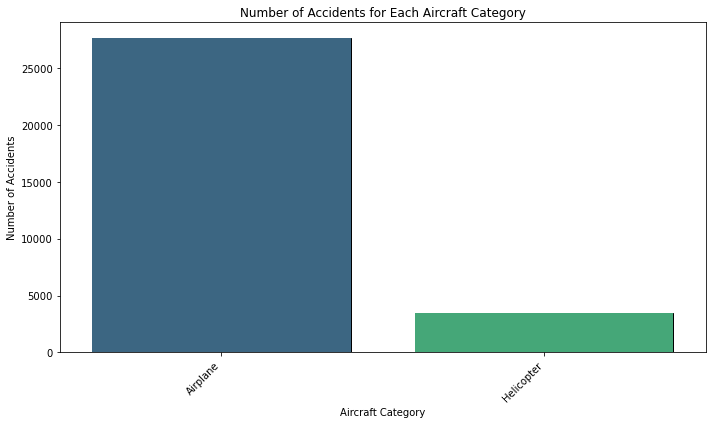

In [242]:
make_counts = df2['Aircraft_Category'].value_counts()

plt.figure(figsize=(10, 6)) 

plt.bar(make_counts.index, make_counts.values, color='skyblue', edgecolor='black')

sns.barplot(x=make_counts.index, y=make_counts.values, palette='viridis')

plt.xlabel('Aircraft Category')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents for Each Aircraft Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

**Observation:**
   - Helicopters are involved in less accidents with less than 5000 reported.
   - Airplanes have over 25,000 accidents recorded.

In [243]:
total_fatalities_by_category = df2.groupby('Aircraft_Category')['Total_Fatal_Injuries'].sum().sort_values(ascending=False)
total_fatalities_by_category

Aircraft_Category
Airplane      16029.0
Helicopter     1778.0
Name: Total_Fatal_Injuries, dtype: float64

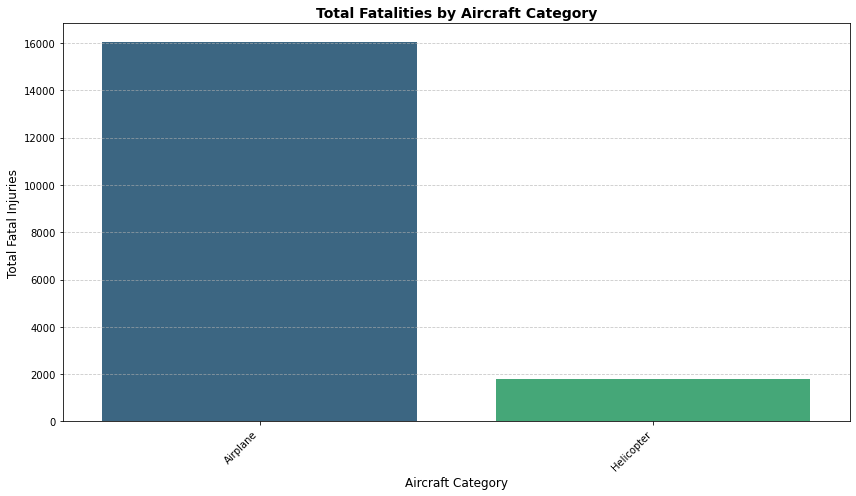

In [244]:
 #Total fatalities per aircraft category

total_fatalities_by_category = df2.groupby('Aircraft_Category')['Total_Fatal_Injuries'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 7)) 

sns.barplot(x=total_fatalities_by_category.index,
            y=total_fatalities_by_category.values,
            palette='viridis')

plt.xlabel('Aircraft Category', fontsize=12) 
plt.ylabel('Total Fatal Injuries', fontsize=12) 
plt.title('Total Fatalities by Aircraft Category', fontsize=14, fontweight='bold') 

# Rotate x-axis
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10) 

plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout() 
plt.show() 

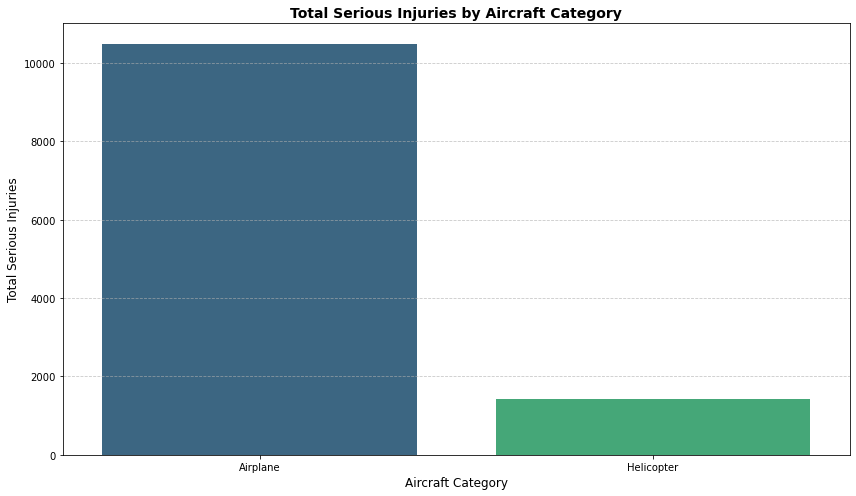

In [245]:
total_serious_by_category = df2.groupby('Aircraft_Category')['Total_Serious_Injuries'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 7)) 

sns.barplot(x=total_serious_by_category.index,
            y=total_serious_by_category.values,
            palette='viridis')

plt.xlabel('Aircraft Category', fontsize=12) 
plt.ylabel('Total Serious Injuries', fontsize=12) 
plt.title('Total Serious Injuries by Aircraft Category', fontsize=14, fontweight='bold') 

# Rotate x-axis
#plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10) 

plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout() 
plt.show() 

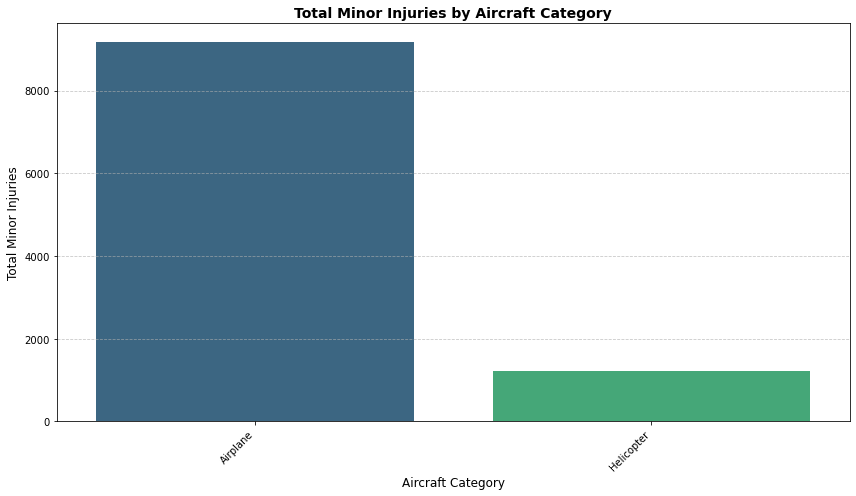

In [246]:
total_minor_by_category = df2.groupby('Aircraft_Category')['Total_Minor_Injuries'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 7)) 

sns.barplot(x=total_minor_by_category.index,
            y=total_minor_by_category.values,
            palette='viridis')

plt.xlabel('Aircraft Category', fontsize=12) 
plt.ylabel('Total Minor Injuries', fontsize=12) 
plt.title('Total Minor Injuries by Aircraft Category', fontsize=14, fontweight='bold') 

# Rotate x-axis
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10) 

plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout() 
plt.show() 

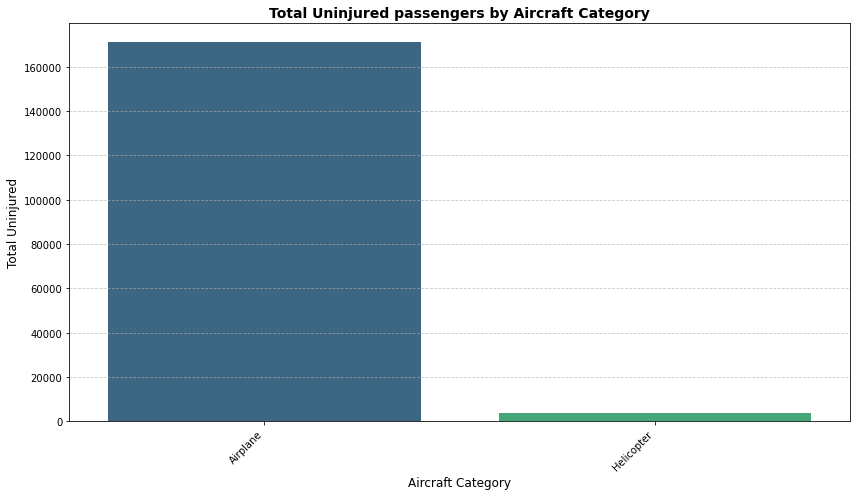

In [247]:
total_uninjured_by_category = df2.groupby('Aircraft_Category')['Total_Uninjured'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 7)) 

sns.barplot(x=total_uninjured_by_category.index,
            y=total_uninjured_by_category.values,
            palette='viridis')

plt.xlabel('Aircraft Category', fontsize=12) 
plt.ylabel('Total Uninjured', fontsize=12) 
plt.title('Total Uninjured passengers by Aircraft Category', fontsize=14, fontweight='bold') 

# Rotate x-axis
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10) 

plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout() 
plt.show() 

In [248]:
uninjured_by_category = df2.groupby('Aircraft_Category')['Total_Uninjured'].sum().sort_values(ascending=False)
uninjured_by_category

Aircraft_Category
Airplane      171011.0
Helicopter      4008.0
Name: Total_Uninjured, dtype: float64

In [249]:
serious_by_category = df2.groupby('Aircraft_Category')['Total_Serious_Injuries'].sum().sort_values(ascending=False)
serious_by_category

Aircraft_Category
Airplane      10486.0
Helicopter     1424.0
Name: Total_Serious_Injuries, dtype: float64

In [250]:
minor_by_category = df2.groupby('Aircraft_Category')['Total_Minor_Injuries'].sum().sort_values(ascending=False)
minor_by_category

Aircraft_Category
Airplane      9164.0
Helicopter    1226.0
Name: Total_Minor_Injuries, dtype: float64

In [251]:
fatal_by_category = df2.groupby('Aircraft_Category')['Total_Fatal_Injuries'].sum().sort_values(ascending=False)
fatal_by_category

Aircraft_Category
Airplane      16029.0
Helicopter     1778.0
Name: Total_Fatal_Injuries, dtype: float64

In [252]:
df2['Aircraft_Category'].value_counts()

Airplane      27617
Helicopter     3440
Name: Aircraft_Category, dtype: int64

**Observation:**
- Airplane (27617 Entries)
 - 171011 uninjured passengers
 - 10486 seriously injured passengers
 - 9164 passengers with minor injuries
 - 16029 fatally injured passengers 
 
 
 
- Helicopter(3440 Entries)
 - 4008 uninjured passengers
 - 1424 seriously injured passengers
 - 1226 passengers with minor injuries
 - 1778 fatally injured passengers 

In [ ]:
 #Faceting with scatter plots
g = sns.FacetGrid(df, col='Total_Uninjured', col_wrap=2, height=4)
g.map(sns.scatterplot, 'Make', 'Aircraft_Category', hue=df2['Aircraft_damage'], palette='viridis', s=80)
g.add_legend()
g.set_axis_labels('Feature A', 'Feature B')
g.set_titles(col_template='Category: {col_name}')
plt.suptitle('Feature A vs. Feature B across Categories', y=1.02)
plt.show()

# Faceting with histograms/KDEs
g = sns.FacetGrid(df, col='Total_Uninjured', col_wrap=2, height=4)
g.map(sns.histplot, 'Engine_Type', kde=True)
g.set_axis_labels('Feature C', 'Count')
g.set_titles(col_template='Category: {col_name}')
plt.suptitle('Distribution of Feature C across Categories', y=1.02)
plt.show()

## Analysis by Aircraft Damage

In [270]:
df2.isnull().sum()

Investigation_Type                0
Make                             12
Purpose_of_flight                 0
Model                            33
Total_Fatal_Injuries           3553
Total_Serious_Injuries            0
Total_Minor_Injuries              0
Total_Uninjured                   0
Weather_Condition              3616
Broad_phase_of_flight             0
Injury_Severity                   0
Aircraft_damage                   0
Aircraft_Category                 0
Registration_Number             272
Number_of_Engines              3282
Engine_Type                       0
Total_Fatal_Injuries_Filled       0
dtype: int64

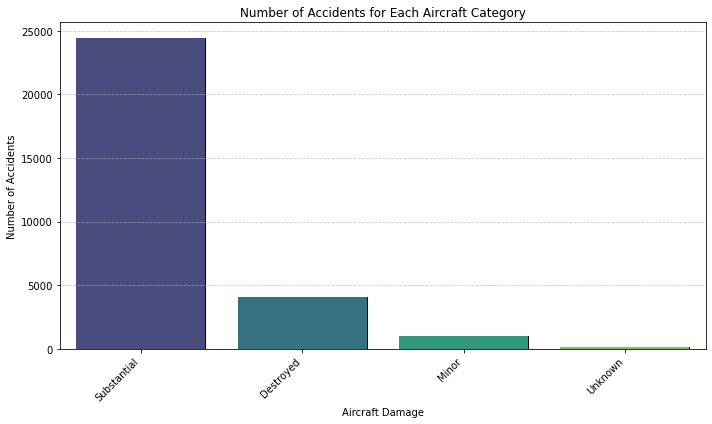

In [99]:
make_counts = df2['Aircraft_damage'].value_counts()

plt.figure(figsize=(10, 6)) 

plt.bar(make_counts.index, make_counts.values, color='skyblue', edgecolor='black')

sns.barplot(x=make_counts.index, y=make_counts.values, palette='viridis')

plt.xlabel('Aircraft Damage')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents for Each Aircraft Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

In [ ]:
total_fatalities_by_damage = df2.groupby('Aircraft_damage')['Total_Fatal_Injuries'].sum()#.sort_values(ascending=False)


plt.figure(figsize=(12, 7)) 

sns.barplot(x=total_fatalities_by_damage.index,
            y=total_fatalities_by_damage.values,
            palette='viridis')

plt.xlabel('Aircraft Damage', fontsize=12) 
plt.ylabel('Total Fatal Injuries', fontsize=12) 
plt.title('Total Fatally Injured passengers by Aircraft Damage', fontsize=14, fontweight='bold') 

# Rotate x-axis
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10) 

plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout() 
plt.show() 

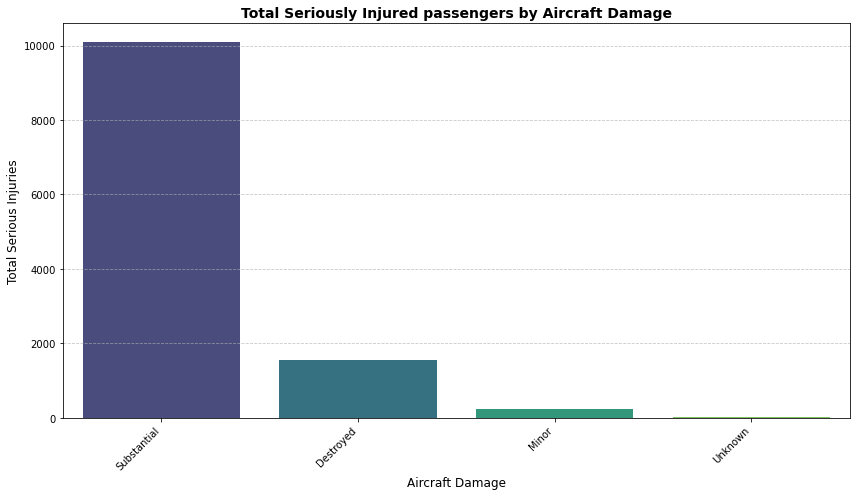

In [267]:
total_serious_by_damage = df2.groupby('Aircraft_damage')['Total_Serious_Injuries'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 7)) 

sns.barplot(x=total_serious_by_damage.index,
            y=total_serious_by_damage.values,
            palette='viridis')

plt.xlabel('Aircraft Damage', fontsize=12) 
plt.ylabel('Total Serious Injuries', fontsize=12) 
plt.title('Total Seriously Injured passengers by Aircraft Damage', fontsize=14, fontweight='bold') 

# Rotate x-axis
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10) 

plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout() 
plt.show() 
    

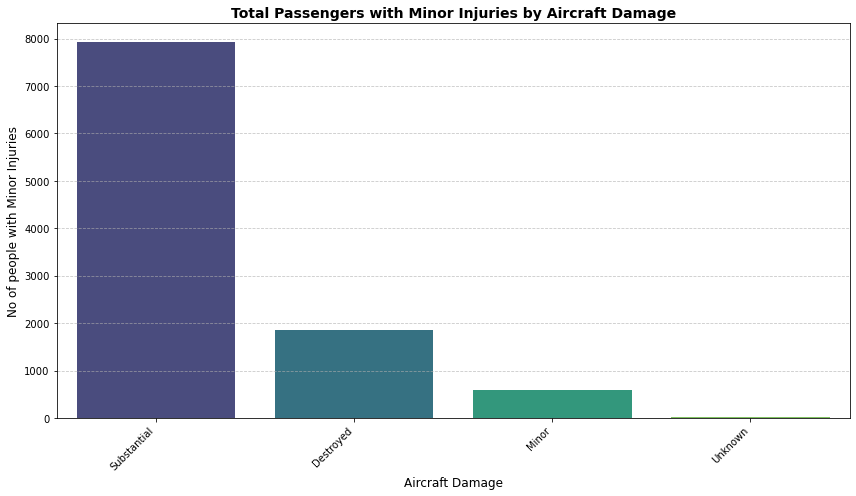

In [268]:
total_minor_by_damage = df2.groupby('Aircraft_damage')['Total_Minor_Injuries'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 7)) 

sns.barplot(x=total_minor_by_damage.index,
            y=total_minor_by_damage.values,
            palette='viridis')

plt.xlabel('Aircraft Damage', fontsize=12) 
plt.ylabel('No of people with Minor Injuries', fontsize=12) 
plt.title('Total Passengers with Minor Injuries by Aircraft Damage', fontsize=14, fontweight='bold') 

# Rotate x-axis
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10) 

plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout() 
plt.show() 

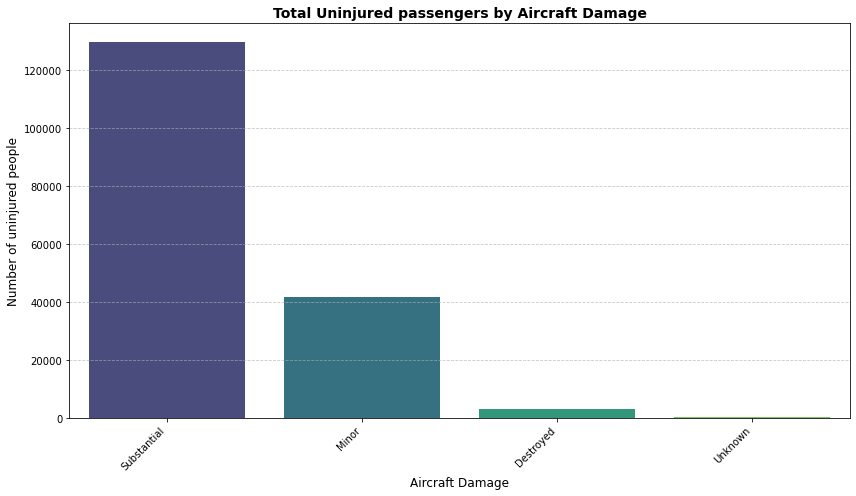

In [269]:
total_uninjured_by_damage = df2.groupby('Aircraft_damage')['Total_Uninjured'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 7)) 

sns.barplot(x=total_uninjured_by_damage.index,
            y=total_uninjured_by_damage.values,
            palette='viridis')

plt.xlabel('Aircraft Damage', fontsize=12) 
plt.ylabel('Number of uninjured people', fontsize=12) 
plt.title('Total Uninjured passengers by Aircraft Damage', fontsize=14, fontweight='bold') 

# Rotate x-axis
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10) 

plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout() 
plt.show() 

**Observation**

In [ ]:
df2['Model']